In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
results_df = pd.read_csv("../data/results_table_weather_flights.csv")

In [100]:
results_df = results_df.drop(columns=["city_id","city_id.1","city_id.2","date", "3hours_forecast"])

In [112]:
results_df = results_df.rename(
    columns={"round(avg(temperature),2)":"avg_temperature",
             "round(avg(rain_in_last_3h),2)":"avg_rain",
             "round(avg(wind_speed),2)":"avg_wind_speed",
            "3hours_forecast_weather": "3hours_forecast"})

In [114]:
results_df["forecast_days"] = pd.to_datetime(results_df["forecast_days"],errors='coerce')
results_df["forecast_days"] = results_df["forecast_days"].dt.date

In [116]:
results_df.head()

,avg_temperature,avg_rain,avg_wind_speed,forecast_days,3hours_forecast,city_name,Sum_flights
0,-0.97,0.0,2.10,2024-01-18,0:00-2:59,Berlin,NaN
1,-1.54,0.0,2.36,2024-01-18,3:00-5:59,Berlin,NaN
2,-1.80,0.0,1.92,2024-01-18,6:00-8:59,Berlin,19.0
3,-1.12,0.0,2.07,2024-01-18,9:00-11:59,Berlin,38.0
4,0.46,0.0,2.54,2024-01-18,12:00-14:59,Berlin,32.0


In [120]:
results_df.groupby(["city_name","forecast_days","3hours_forecast"]).mean()

avg_temperature  avg_rain  \
city_name forecast_days 3hours_forecast                              
Berlin    2024-01-18    0:00-2:59                  -0.97       0.0   
                        12:00-14:59                 0.46       0.0   
                        15:00-17:59                -1.25       0.0   
                        18:00-20:59                -2.11       0.0   
                        21:00-23:59                -3.02       0.0   
...                                                  ...       ...   
Munich    2024-01-20    18:00-20:59                -4.02       0.0   
                        21:00-23:59                -4.48       0.0   
                        3:00-5:59                  -5.64       0.0   
                        6:00-8:59                  -6.07       0.0   
                        9:00-11:59                 -3.79       0.0   

                                         avg_wind_speed  Sum_flights  
city_name forecast_days 3hours_forecast                               
Berlin    2024-01-18    0:00-2:59                  2.10          NaN  
                        12:00-14:59                2.54         32.0  
                        15:00-17:59                2.43         22.0  
                        18:00-20:59                3.63         33.0  
                        21:00-23:59                3.60         34.0  
...                                                 ...          ...  
Munich    2024-01-20    18:00-20:59                2.15         61.0  
                        21:00-23:59                2.29         20.0  
                        3:00-5:59                  1.38          3.0  
                        6:00-8:59                  0.87         49.0  
                        9:00-11:59                 1.64         75.0  

[120 rows x 4 columns]

C:\Users\hanne\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


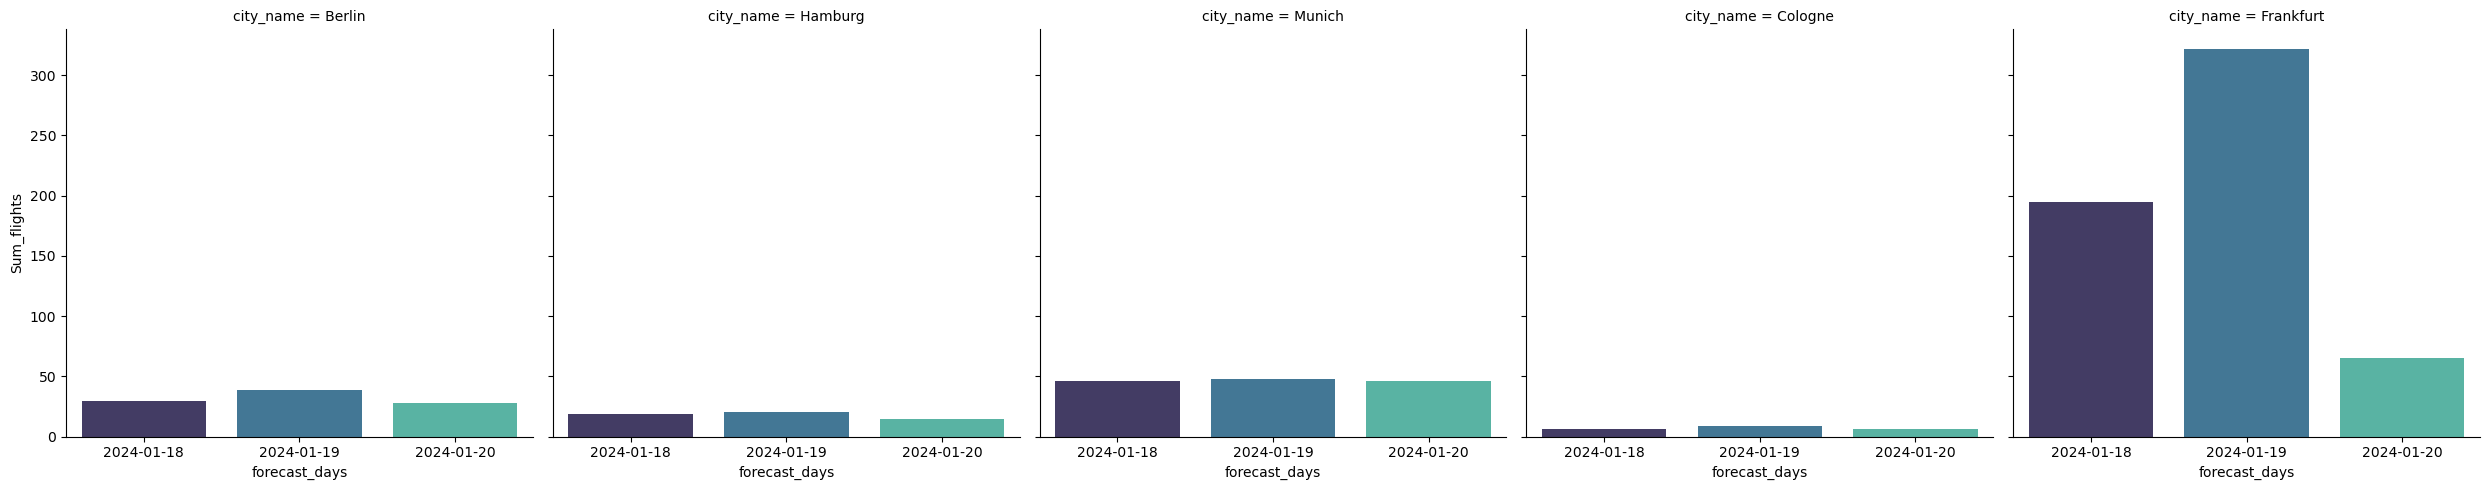

In [110]:
sns.catplot(        
            data= results_df,
            kind = "bar",
            x = "forecast_days",
            y = "Sum_flights",
            palette = "mako",
            errorbar=None,
            col = "city_name",
            );